IMPORTANDO BIBLIOTECAS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

c:\Users\raphael.gaias.TACLA\Documents\Alura\Ciência de Dados\Data Science\.venv\Lib\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


Realizando leitura dos dados

In [2]:
df_idade = pd.read_csv ('data/dados_idade_aposentadoria.csv')
df_altura = pd.read_csv ('data/dados_alturas.csv')
df_vida_lampada = pd.read_csv ('data/dados_vida_lampada.csv')

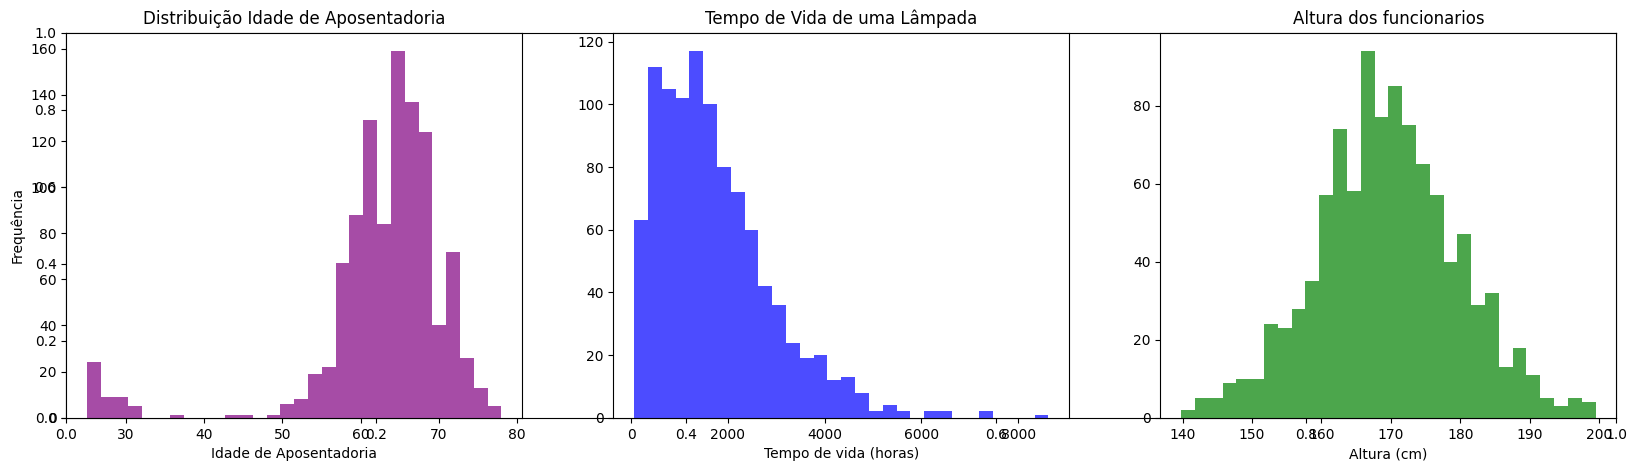

In [3]:
plt.subplots (figsize=(20,5))
plt.subplot(131)
plt.title('Distribuição Idade de Aposentadoria')
plt.xlabel ('Idade de Aposentadoria')
plt.ylabel ('Frequência')
plt.hist (df_idade, bins=30, alpha=0.7, color='purple')

plt.subplot(132)
plt.hist(df_vida_lampada, bins=30, alpha=0.7, color='blue')
plt.title('Tempo de Vida de uma Lâmpada')
plt.xlabel ('Tempo de vida (horas)')

plt.subplot (133)
plt.hist (df_altura, bins=30, alpha=0.7, color='green')
plt.title ('Altura dos funcionarios')
plt.xlabel ('Altura (cm)')

plt.show ()

In [4]:
#tamanho da amostra
n=100

#quantidade de amostras
qnt=100000

#função de reamostragem

def reamostraem_medias (dados, coluna, n, qnt):
    medias = [dados[coluna].sample(n, replace=True).mean()
              for _ in range (qnt)]
    
    return medias


In [5]:
df_altura.head()

,alturas
0,167.52
1,185.21
2,172.74
3,171.52
4,157.75


In [6]:
media_aposentadoria = reamostraem_medias(df_idade, 'idade', n, qnt)
media_altura = reamostraem_medias(df_altura, 'alturas', n, qnt)
media_vida_lampada = reamostraem_medias(df_vida_lampada, 'duracao', n, qnt)

In [7]:
print ('''  Médias populacionais    ''')

print ('idade', df_idade['idade'].mean())
print ('duracao', df_vida_lampada['duracao'].mean())
print ('altura', df_altura['alturas'].mean())

  Médias populacionais    
idade 62.70857142857143
duracao 1731.8036029420002
altura 169.52022


In [8]:
def avg (list):
    return sum(list) / len(list)

print ('''  Médias amostrais    ''')

print ('idade', avg (media_aposentadoria))
print ('duracao', avg (media_vida_lampada))
print ('altura', avg (media_altura))

  Médias amostrais    
idade 62.71056309999957
duracao 1732.0528523590956
altura 169.51935161499895


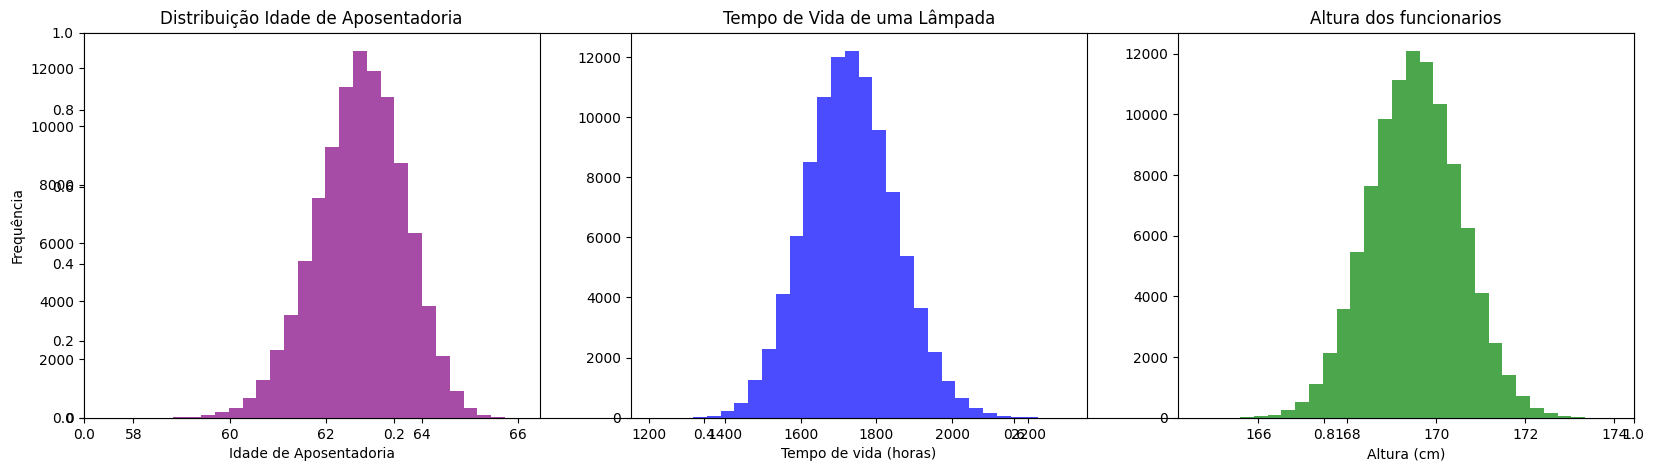

In [9]:
plt.subplots (figsize=(20,5))
plt.subplot(131)
plt.title('Distribuição Idade de Aposentadoria')
plt.xlabel ('Idade de Aposentadoria')
plt.ylabel ('Frequência')
plt.hist (media_aposentadoria, bins=30, alpha=0.7, color='purple')

plt.subplot(132)
plt.hist(media_vida_lampada, bins=30, alpha=0.7, color='blue')
plt.title('Tempo de Vida de uma Lâmpada')
plt.xlabel ('Tempo de vida (horas)')

plt.subplot (133)
plt.hist (media_altura, bins=30, alpha=0.7, color='green')
plt.title ('Altura dos funcionarios')
plt.xlabel ('Altura (cm)')

plt.show ()

In [10]:
media_nova_amostra = 1200

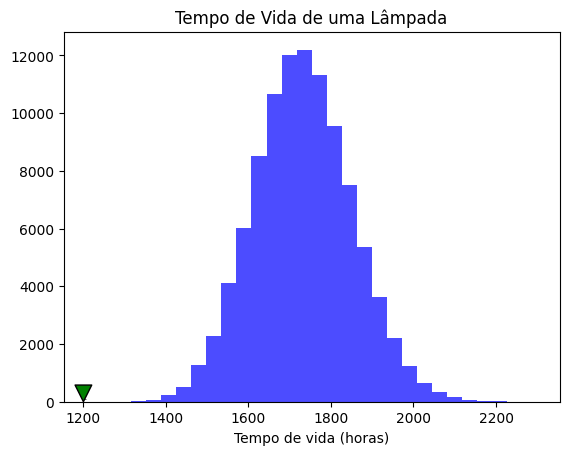

In [11]:
plt.hist(media_vida_lampada, bins=30, alpha=0.7, color='blue')
plt.title('Tempo de Vida de uma Lâmpada')
plt.xlabel ('Tempo de vida (horas)')
plt.annotate('.', xy=(media_nova_amostra, 0), xytext=(media_nova_amostra, 100), fontsize=8,
            arrowprops=dict(facecolor='green'))
plt.show()

In [12]:
duracao_amostra = pd.DataFrame ({'medias_duracao': media_vida_lampada})

In [13]:
media_das_medias = duracao_amostra['medias_duracao'].mean()
ep = duracao_amostra['medias_duracao'].std()

print ('''  Médias amostrais    ''')

print ('Média', media_das_medias)
print ('erro padrao', ep)

  Médias amostrais    
Média 1732.052852359093
erro padrao 118.46890970493618


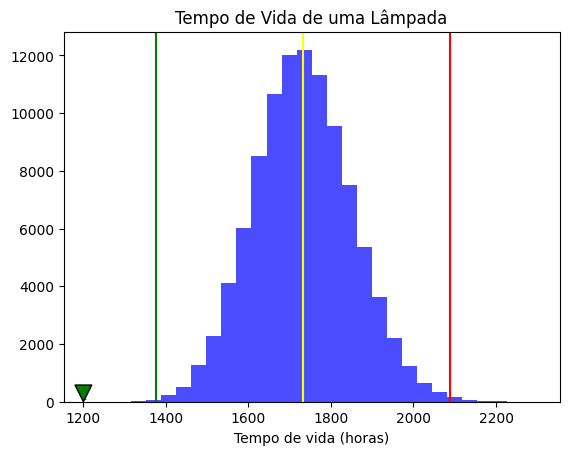

In [15]:
plt.hist(media_vida_lampada, bins=30, alpha=0.7, color='blue')
plt.title('Tempo de Vida de uma Lâmpada')
plt.xlabel ('Tempo de vida (horas)')
plt.axvline (media_das_medias, color='Yellow')
plt.axvline (media_das_medias + 3*ep, color='Red')
plt.axvline (media_das_medias - 3*ep, color='Green')
plt.annotate('.', xy=(media_nova_amostra, 0), xytext=(media_nova_amostra, 100), fontsize=8,
            arrowprops=dict(facecolor='green'))
plt.show()

In [ ]:
qnt_obs = duracao_amostra[(duracao_amostra > media_das_medias - 3*ep) & (duracao_amostra < media_das_medias + 3*ep)]


medias_duracao    0.9972
dtype: float64

In [20]:
qnt_obs.count()/duracao_amostra.count()*100

medias_duracao    99.72
dtype: float64